In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
Customer_df= pd.read_csv('Churn_Modelling.csv')

In [3]:
Customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
Customer_df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
Customer_df['Gender'].unique()
Customer_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
#Encoding column gender using label encoding
label_encoder=LabelEncoder()
Customer_df['Gender']=label_encoder.fit_transform(Customer_df['Gender'])
Customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Encoding column Geography using one-hot encoding
Customer_df = pd.get_dummies(Customer_df, columns=["Geography"])
Customer_df= Customer_df.astype(int)
Customer_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,0,1


In [9]:
#Scaling numerical columns
numerical_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scaler=StandardScaler()
Customer_df[numerical_cols]=scaler.fit_transform(Customer_df[numerical_cols])

In [10]:
Customer_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225847,1,1,1,0.021880,1,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117342,1,0,1,0.216532,0,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333050,3,1,0,0.240686,1,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225847,2,0,0,-0.108920,0,1,0,0
4,2.063884,0,0.388871,-1.041760,0.785723,1,1,1,-0.365269,0,0,0,1


#Heatmap to define correlation between features

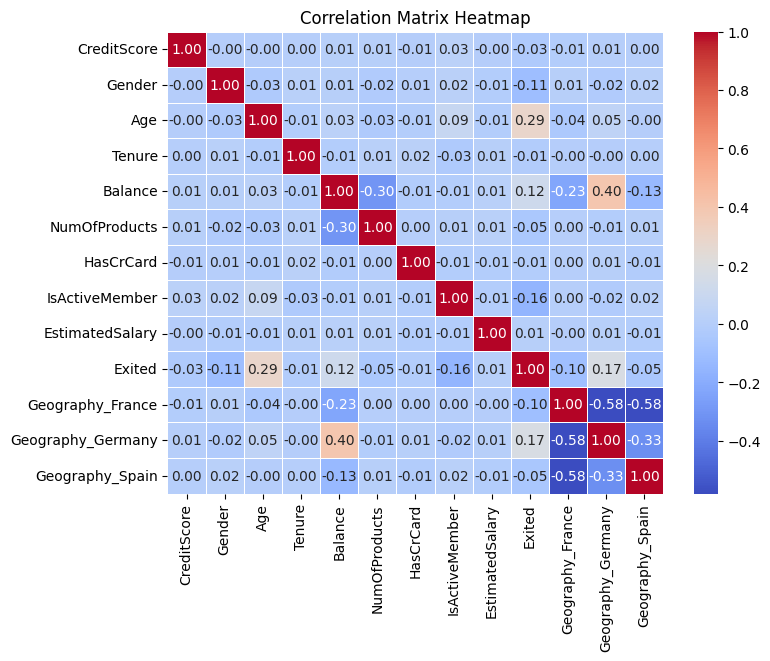

In [32]:
correlation_matrix = Customer_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
X=Customer_df.drop(columns=['Exited'])
y=Customer_df['Exited']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=50)


#Logistic Regression Model

In [14]:
#Logistic Regression Model

LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)

LR_predict=LR_model.predict(X_test)

In [15]:
#Testing the model accuracy

accuracy = LR_model.score(X_test, y_test)
print("Accuracy for Logistic Regression:", accuracy)
f1 = f1_score(y_test, LR_predict)
print("F1-score for Logistic Regression:", f1)

Accuracy for Logistic Regression: 0.817
F1-score for Logistic Regression: 0.351063829787234


In [16]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, LR_predict))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3185
           1       0.63      0.24      0.35       815

    accuracy                           0.82      4000
   macro avg       0.73      0.60      0.62      4000
weighted avg       0.79      0.82      0.78      4000




#Naive Bayes Model

In [17]:
#Naive Bayes Model

NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [18]:
NB_predict=NB_model.predict(X_test)

In [19]:
accuracy_NB = accuracy_score(y_test, NB_predict)
print("Accuracy for Naive Bayes:", accuracy_NB)
f1_NB = f1_score(y_test, NB_predict)
print("F1-score for Naive Bayes:", f1_NB)

Accuracy for Naive Bayes: 0.821
F1-score for Naive Bayes: 0.47041420118343197


In [20]:
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, NB_predict))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3185
           1       0.59      0.39      0.47       815

    accuracy                           0.82      4000
   macro avg       0.72      0.66      0.68      4000
weighted avg       0.80      0.82      0.81      4000



#Gradient Boosting model

In [21]:
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB_model.fit(X_train, y_train)
GB_predict = GB_model.predict(X_test)

In [22]:
GB_accuracy = accuracy_score(y_test, GB_predict)
GB_f1 = f1_score(y_test, GB_predict, average='weighted')

In [23]:
print("Gradient Boosting - Accuracy:", GB_accuracy, "F1-score:", GB_f1)

Gradient Boosting - Accuracy: 0.86175 F1-score: 0.850786482981554


#Models Comparison

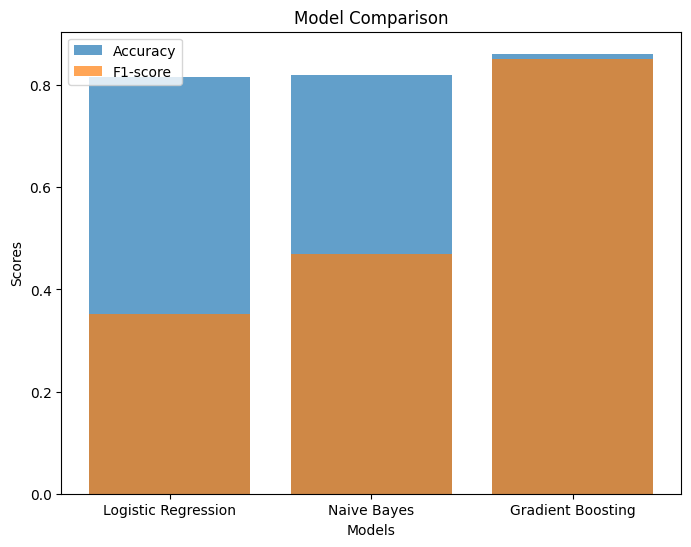

In [29]:
# Plot model comparison
models = ['Logistic Regression', 'Naive Bayes', 'Gradient Boosting']
accuracies = [accuracy, accuracy_NB, GB_accuracy]
f1_scores = [f1, f1_NB, GB_f1]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, alpha=0.7, label='Accuracy')
plt.bar(models, f1_scores, alpha=0.7, label='F1-score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Plotting feature importances for Gradient Boosting


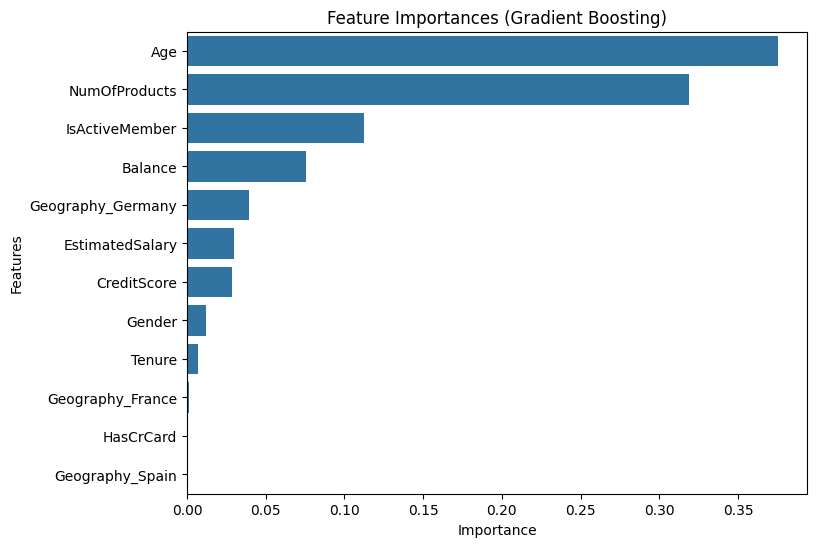

In [30]:
feature_importances = GB_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title('Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
